In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
# reviews_df_raw = pd.read_json("../Data/amazon_reviews.json",lines=True)
# reviews_pickle = reviews_df_raw.to_pickle('reviews_raw.pkl')
reviews_df_raw = pd.read_pickle('reviews_raw.pkl')
reviews_df_raw

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,image,style
0,2,12,False,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,NaN
1,1,21,False,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,NaN
2,3,19,True,"09 12, 2016",A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN,NaN
3,5,NaN,True,"03 2, 2017",A139PXTTC2LGHZ,0020232233,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN,NaN
4,1,3,True,"02 8, 2017",A3IB33V29XIL8O,0020232233,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8201226,5,NaN,False,"12 7, 2017",A3OCDEVI6FGUWU,B01HJBAKIO,wilson,My son is happy!!!,Five Stars,1512604800,NaN,NaN
8201227,5,2,True,"01 23, 2016",A1KTVUVADLKWZO,B01HJHA7GI,Raven the Maven,E My ten month old has had this for a few mont...,Fun for ten month old,1453507200,[https://images-na.ssl-images-amazon.com/image...,NaN
8201228,5,NaN,True,"02 8, 2015",A2QCA9OE62IPZ4,B01HJHA7GI,crhug,perfect toy to keep baby amused,Five Stars,1423353600,NaN,NaN
8201229,5,NaN,True,"12 31, 2014",A3N28JAZYS4L9O,B01HJHA7GI,Cindy Volk,Perfect,Five Stars,1419984000,NaN,NaN


Column Title Meanings

In [3]:
reviews_df_raw.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'image',
       'style'],
      dtype='object')

In [4]:
reviews_df_raw.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,image,style
0,2,12,False,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,NaN
1,1,21,False,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,NaN
2,3,19,True,"09 12, 2016",A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN,NaN
3,5,NaN,True,"03 2, 2017",A139PXTTC2LGHZ,0020232233,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN,NaN
4,1,3,True,"02 8, 2017",A3IB33V29XIL8O,0020232233,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN,NaN


- overall - rating of the product
- vote - helpful votes of the review (so people that gave a thumbs up)
- verified - a boolean of whether the data was verified or not
- reviewTime - time of the review (raw)
- reviewerID - ID of the reviewer
- asin - ID of the product
- reviewerName - name of the reviewer
- reviewText - text of the review
- summary - review title
- unixReviewTime - time of the review (unix time)
- image - images that users post after they have received the product
- style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
- summary - summary of the review

### Begin EDA

Look at the data NaN values

In [5]:
# count and percentage of missing values in each column
missing_counts = reviews_df_raw.isna().sum()
missing_percentages = reviews_df_raw.isna().mean() * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)
print("Missing Values Overview:")
print(missing_df)

Missing Values Overview:
              Missing Count  Missing Percentage
image               7999253           97.537223
vote                7239598           88.274529
style               6211781           75.742056
reviewText             7117            0.086780
summary                2531            0.030861
reviewerName            502            0.006121


Duplicates in the dataset

In [7]:
# check for duplicates in the reviews
duplicates = reviews_df_raw.duplicated(subset=['reviewerID', 'asin', 'reviewTime', 'overall'], keep=False)
print(f"Number of duplicate reviews: {duplicates.sum()}")
# show the duplicate reviews
duplicate_reviews = reviews_df_raw[duplicates]
print("Duplicate Reviews:")
duplicate_reviews[['reviewerID', 'asin', 'reviewTime', 'overall', 'reviewText']]


Number of duplicate reviews: 392279
Duplicate Reviews:


,reviewerID,asin,reviewTime,overall,reviewText
1144,ABWSQI9992Q29,0786955554,"09 25, 2016",5,nice
1145,ABWSQI9992Q29,0786955554,"09 25, 2016",5,nice
1154,A115TZEJ3U3AER,0786955554,"05 11, 2016",5,On-time and nice item.
1155,A115TZEJ3U3AER,0786955554,"05 11, 2016",5,On-time and nice item.
1266,AN82BJBT7QNT7,0786955554,"06 26, 2011",4,This set is slightly worse than earlier ones (...
...,...,...,...,...,...
8189354,A5FVEFQ55OHRS,B01H25XJ76,"07 20, 2017",5,She is happy
8189355,A5FVEFQ55OHRS,B01H25XJ76,"07 20, 2017",5,everyone is happpy
8189356,A5FVEFQ55OHRS,B01H25XJ76,"07 20, 2017",5,The 6 year old loves it
8199065,AY6VLC56K8CVX,B01HGKDE22,"12 6, 2016",5,very pleased with promptness and quality


Data type in each column

In [6]:
reviews_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8201231 entries, 0 to 8201230
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   vote            object
 2   verified        bool  
 3   reviewTime      object
 4   reviewerID      object
 5   asin            object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  image           object
 11  style           object
dtypes: bool(1), int64(2), object(9)
memory usage: 696.1+ MB


Distribution of Ratings

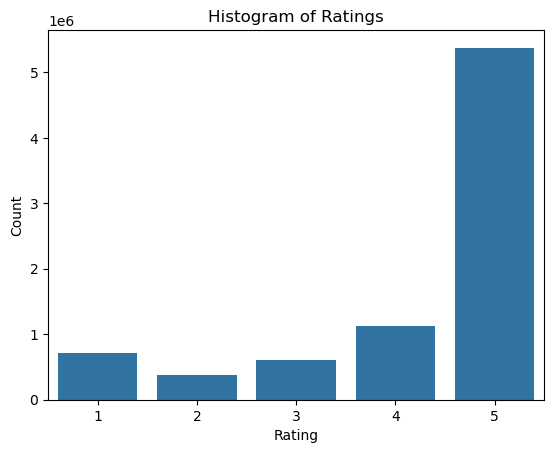

In [26]:
sns.countplot(x='overall', data=reviews_df_raw)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
reviews_df_raw['overall'] = reviews_df_raw['overall'].astype(int)
reviews_df_raw['overall'].describe()

count    8.201231e+06
mean     4.229314e+00
std      1.280496e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

Review Text Length Distribution

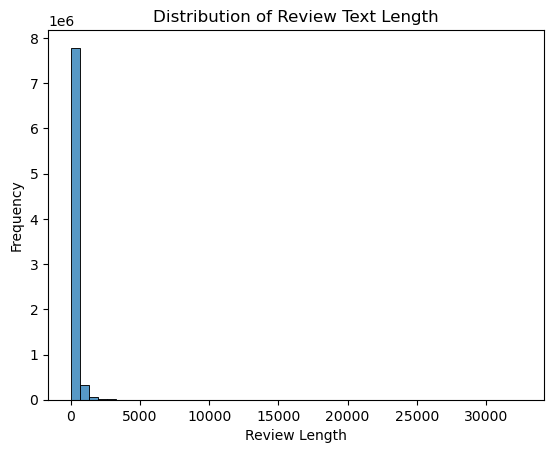

In [9]:
# review text length
reviews_df_raw['review_length'] = reviews_df_raw['reviewText'].apply(lambda x: len(x) if isinstance(x, str) else 0)
sns.histplot(reviews_df_raw['review_length'], bins=50)
plt.title('Distribution of Review Text Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Length distribution (number of characters or words)
reviews_df_raw['review_length'].describe()

count    8.201231e+06
mean     1.935300e+02
std      3.096168e+02
min      0.000000e+00
25%      4.100000e+01
50%      1.090000e+02
75%      2.230000e+02
max      3.256300e+04
Name: review_length, dtype: float64

Unique Number of Products and Reviews Per Product

In [11]:
print(f"There are {len(reviews_df_raw['asin'].unique())} unique products.")

There are 624792 unique products.


        review_count
count  624792.000000
mean       13.126338
std        66.866361
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max     12680.000000


<Axes: xlabel='review_count', ylabel='Count'>

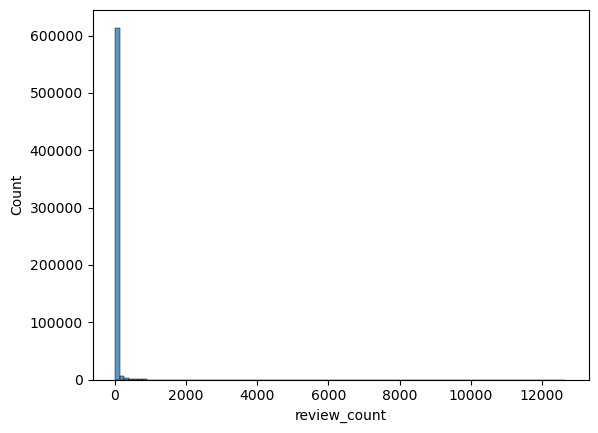

In [12]:
# count the number of reviews per product
reviews_per_product = reviews_df_raw.groupby('asin').size().reset_index(name='review_count')
# look at summary statistics for the number of reviews per product
print(reviews_per_product.describe())
# plot the distribution of the number of reviews per product
sns.histplot(reviews_per_product['review_count'], bins=100)



<Axes: xlabel='review_count'>

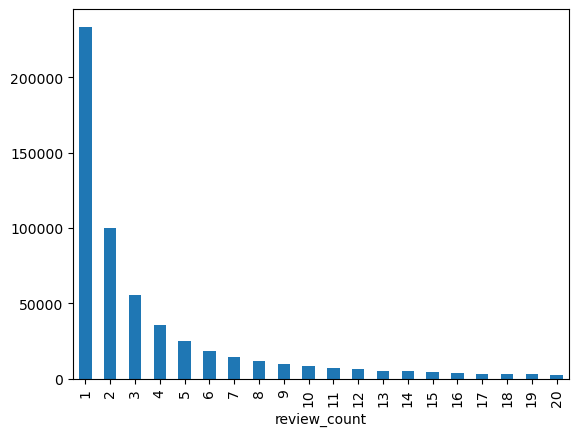

In [13]:
# overview of the number of reviews per product
reviews_per_product['review_count'].value_counts().sort_index().head(20).plot(kind='bar')

In [14]:
# show the product with the most reviews
reviews_per_product.sort_values(by='review_count', ascending=False).head(20)

,asin,review_count
67864,B000YDDF6O,12680
182924,B004S8F7QM,8816
517297,B010TQY7A8,7487
499642,B00WR5357G,6617
157352,B003UCODIA,6188
428799,B00MNG37C2,4639
64063,B000WD3XBI,4590
621560,B01H1NV1RE,4340
484192,B00U78NQHO,4225
517316,B010TU7LP2,4197


Heatmap of Some of the Columns

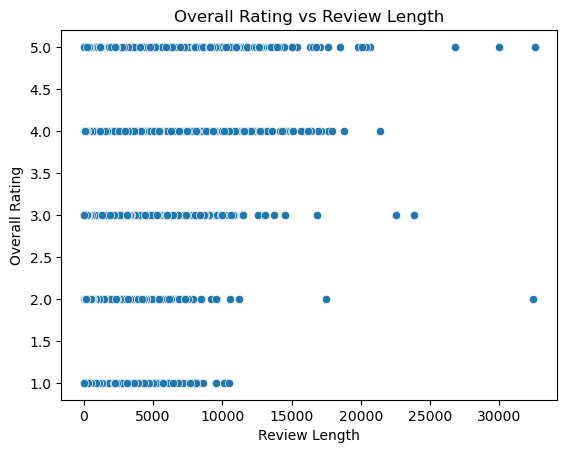

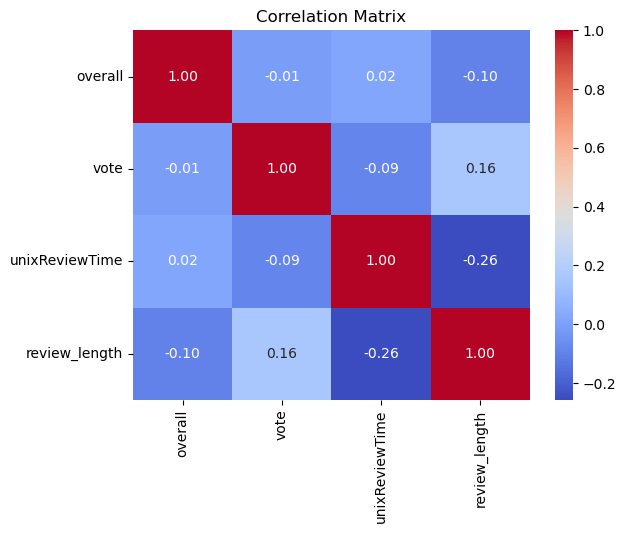

In [15]:
# correlation between overall rating and review length
sns.scatterplot(x='review_length', y='overall', data=reviews_df_raw)
plt.title('Overall Rating vs Review Length')
plt.xlabel('Review Length')
plt.ylabel('Overall Rating')
plt.show()

# Ensure 'vote' is numeric for correlation calculation
if 'vote' in reviews_df_raw.columns:
	reviews_df_raw['vote'] = pd.to_numeric(reviews_df_raw['vote'].str.replace(',', ''), errors='coerce')

# correlation matrix (only numeric columns)
correlation_matrix = reviews_df_raw.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

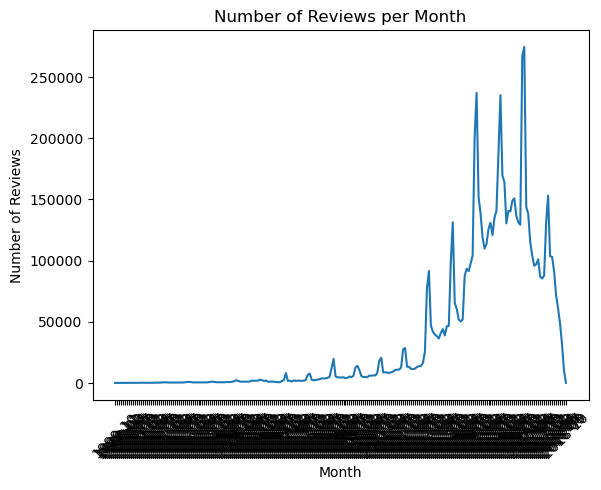

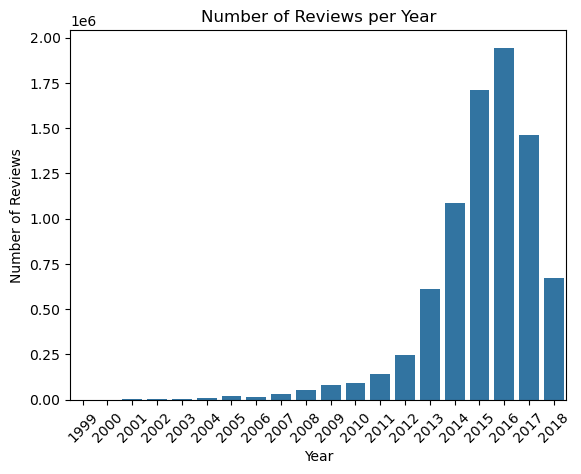

In [16]:
# Plot number of reviews per month/year using reviewTime or unixReviewTime.
reviews_df_raw['reviewTime'] = pd.to_datetime(reviews_df_raw['reviewTime'], errors='coerce')
reviews_df_raw['review_month'] = reviews_df_raw['reviewTime'].dt.to_period('M')
reviews_per_month = reviews_df_raw.groupby('review_month').size().reset_index(name='review_count')
# Convert review_month to string for plotting
reviews_per_month['review_month_str'] = reviews_per_month['review_month'].astype(str)
sns.lineplot(x='review_month_str', y='review_count', data=reviews_per_month)
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# do the same but for the year
reviews_df_raw['review_year'] = reviews_df_raw['reviewTime'].dt.year
reviews_per_year = reviews_df_raw.groupby('review_year').size().reset_index(name='review_count')
sns.barplot(x='review_year', y='review_count', data=reviews_per_year)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


Copying the Article

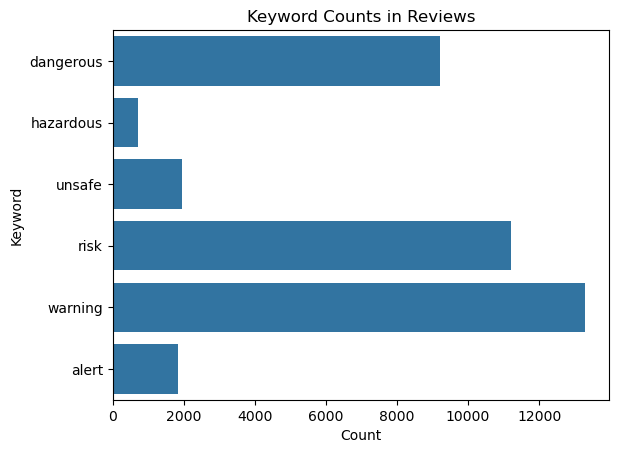

In [ ]:
# look for certain keywords in the review text and summary
keywords = ['dangerous', 'hazardous', 'unsafe', 'risk', 'warning', 'alert']

for keyword in keywords:
    reviews_df_raw[f'contains_{keyword}'] = reviews_df_raw['reviewText'].str.contains(keyword, case=False, na=False) | \
                                             reviews_df_raw['summary'].str.contains(keyword, case=False, na=False)
# count the number of reviews containing each keyword
keyword_counts = {keyword: reviews_df_raw[f'contains_{keyword}'].sum() for keyword in keywords}
# create a DataFrame for keyword counts 
keyword_counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
# plot the keyword counts
sns.barplot(x='Count', y='Keyword', data=keyword_counts_df)
plt.title('Keyword Counts in Reviews')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

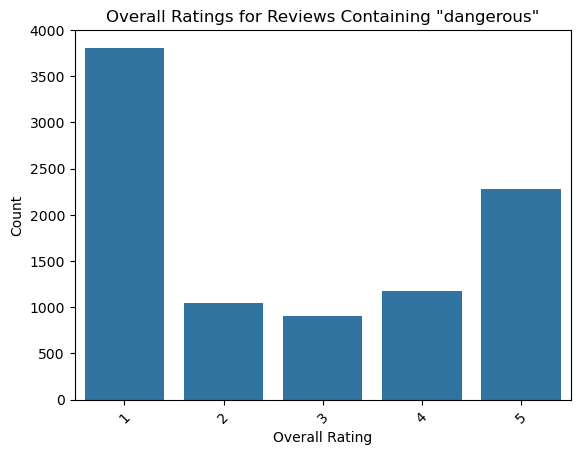

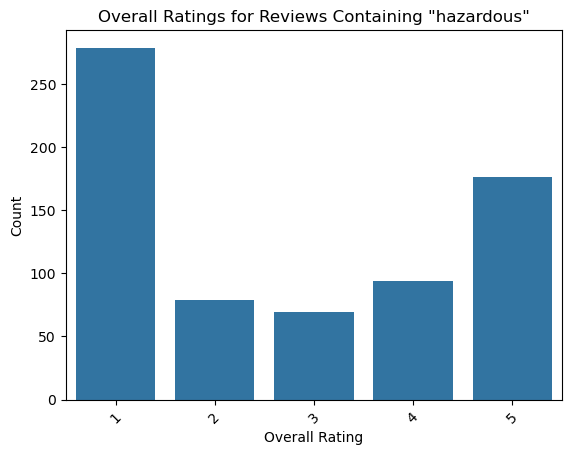

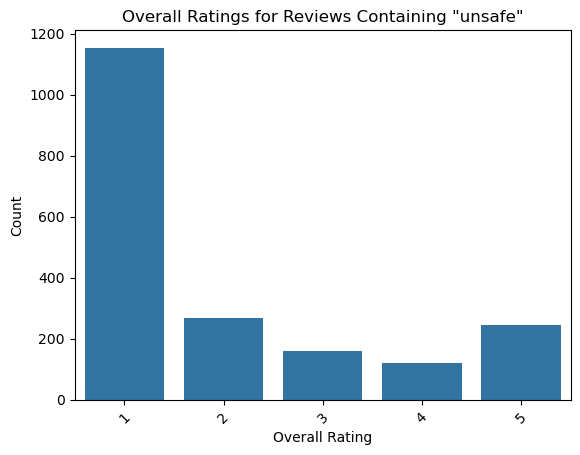

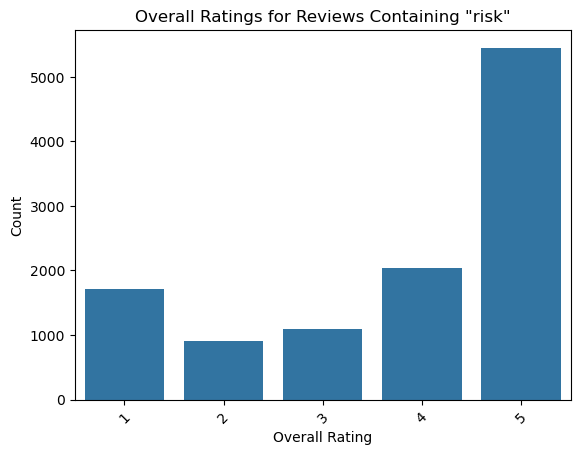

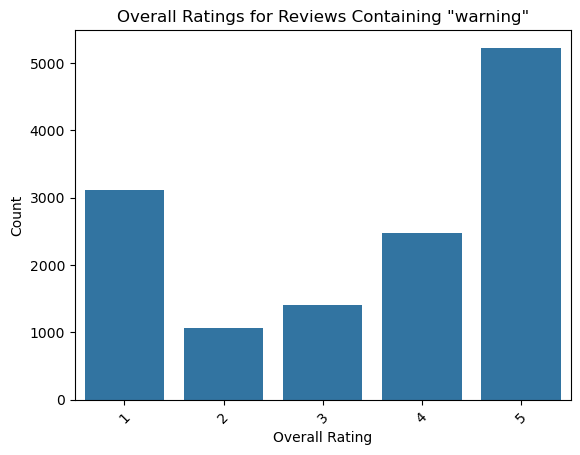

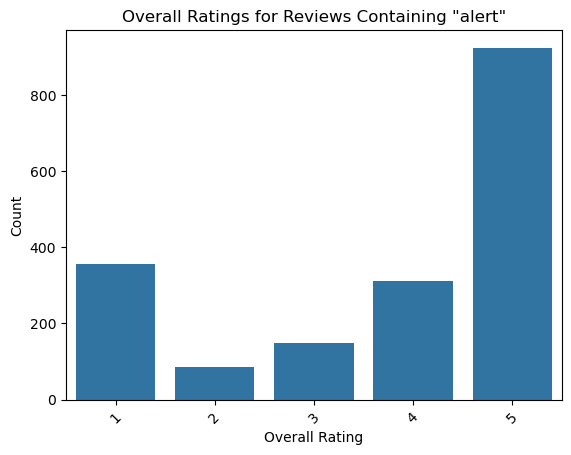

In [18]:
# show the overall for each keyword
for keyword in keywords:
    overall_counts = reviews_df_raw[reviews_df_raw[f'contains_{keyword}']]['overall'].value_counts().sort_index()
    sns.barplot(x=overall_counts.index, y=overall_counts.values)
    plt.title(f'Overall Ratings for Reviews Containing "{keyword}"')
    plt.xlabel('Overall Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# return all rows that contain the keyword 'hazardous' in the review text or summary
# because we are in a toys and games context, there are some reviews that mention 'hazardous' in a non-negative context, so we will filter them
hazardous_reviews = reviews_df_raw[reviews_df_raw['contains_hazardous']]
print(f"Number of reviews containing 'hazardous': {len(hazardous_reviews)}")
# display the first few rows of hazardous reviews
hazardous_reviews[['reviewerID', 'asin', 'reviewTime', 'overall', 'reviewText', 'summary']].to_clipboard()

Number of reviews containing 'hazardous': 697


In [23]:
# show the asins for the hazardous reviews
hazardous_asins = hazardous_reviews['asin'].unique()
print(f"Unique ASINs for hazardous reviews: {len(hazardous_asins)}")
# display the first few hazardous ASINs
print("Hazardous ASINs:")
for asin in hazardous_asins[:10]:
    print(asin)

Unique ASINs for hazardous reviews: 625
Hazardous ASINs:
1589944623
1940825911
B00000DMFD
B00000ISOQ
B00000IUXC
B00000IV8D
B00000IS6G
B00000IZOR
B00000K3BR
B00001P4QK


In [ ]:
# check if the reviews or summaries contain the keyword 'recall'
recall_reviews = reviews_df_raw[reviews_df_raw['reviewText'].str.contains('recall', case=False, na=False) | 
                                 reviews_df_raw['summary'].str.contains('recall', case=False, na=False)]
print(f"Number of reviews containing 'recall': {len(recall_reviews)}")
# display the first few rows of recall reviews
recall_reviews[['reviewerID', 'asin', 'reviewTime', 'overall', 'reviewText', 'summary']].sample(100).to_clipboard()

# some of these talk about an item recall but some are just using the word 'recall' in a different context

Number of reviews containing 'recall': 3957


WordCloud-ing

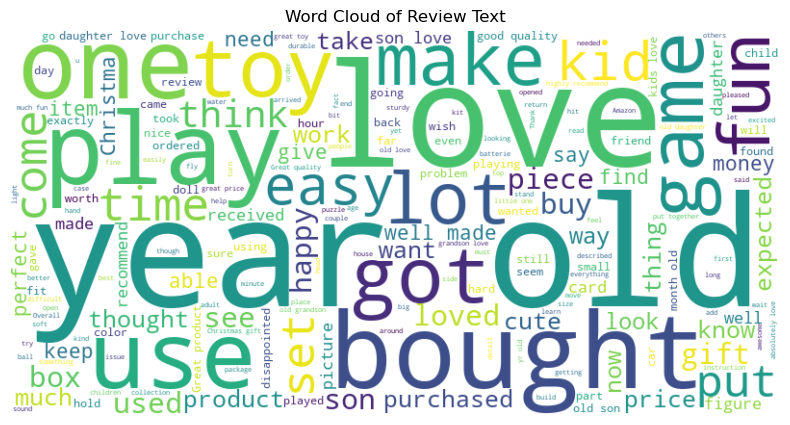

In [58]:
# word cloud of the most common words in the review text
!pip install wordcloud
from wordcloud import WordCloud
text = ' '.join(reviews_df_raw['reviewText'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

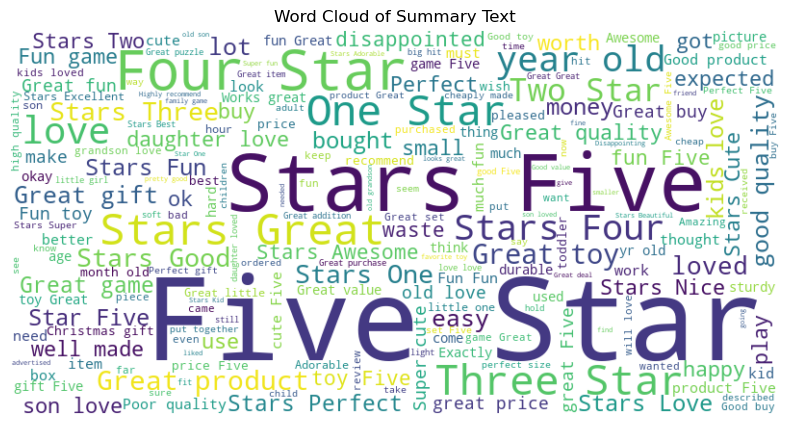

In [59]:
text = ' '.join(reviews_df_raw['summary'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary Text')
plt.show()

Combing Through the Review Text

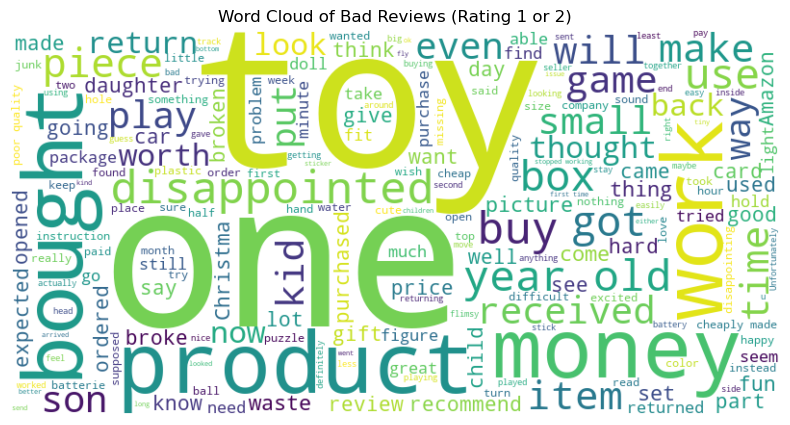

In [65]:
# find bad reviews (rating 1 or 2) and plot the most common words in the review text
bad_reviews = reviews_df_raw[reviews_df_raw['overall'].isin([1, 2])]
text_bad = ' '.join(bad_reviews['reviewText'].dropna().astype(str).tolist())
wordcloud_bad = WordCloud(width=800, height=400, background_color='white').generate(text_bad)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bad Reviews (Rating 1 or 2)')
plt.show()

In [62]:
reviews_df_raw.loc[reviews_df_raw['asin']== 'B000YDDF6O', ['reviewText', 'summary']].head(10).to_clipboard(index=False)